## Time Series Analysis

In [81]:
#Importing Libraries
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import acf, pacf
from pandas.plotting import autocorrelation_plot
from lec6code import *
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import VAR, DynamicVAR
from scipy import signal

In [82]:
#Changing Current Working directory
os.chdir("C:/Users/sudha/Box Sync/Spring 19/Python/Assignment 3")

In [83]:
#Loading Bit Coin Dataset
bit_coin=pd.read_csv("BitCoin_Price.csv")
bit_coin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-01,805.940002,829.929993,770.969971,815.940002,815.940002,8663855
1,2014-01-02,815.940002,886.210022,810.469971,856.909973,856.909973,10826907
2,2014-01-03,856.909973,888.229980,839.440002,884.260010,884.260010,8409629
3,2014-01-04,884.260010,932.159973,848.320007,924.690002,924.690002,12784626
4,2014-01-05,924.690002,1029.859985,911.359985,1014.739990,1014.739990,20789364


In [84]:
coin=bit_coin[['Date','Close']] #Dropping the unused columns
coin.columns=['observation_date','bit_coin'] #Renaming Columns
coin['observation_date'] = pd.to_datetime(coin['observation_date']) #Changing the format of the date from object to DateTime
coin.head() #Printing the head of the modified DataFrame

C:\Users\sudha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,observation_date,bit_coin
0,2014-01-01,815.940002
1,2014-01-02,856.909973
2,2014-01-03,884.260010
3,2014-01-04,924.690002
4,2014-01-05,1014.739990


In [85]:
#Loading London bullion market price for gold (in US dollars) dataset
gold=pd.read_excel('GOLDAMGBD228NLBM.xls')
gold.head()

,observation_date,GOLDAMGBD228NLBM
0,2014-01-02,1219.75
1,2014-01-03,1232.25
2,2014-01-06,1238.00
3,2014-01-07,1237.50
4,2014-01-08,1226.50


In [86]:
#Loading S&P 500 dataset
sp500=pd.read_excel('sp500.xls')
sp500.head()

,observation_date,SP500
0,2014-01-02,1831.98
1,2014-01-03,1831.37
2,2014-01-06,1826.77
3,2014-01-07,1837.88
4,2014-01-08,1837.49


In [87]:
#Loading US/Euro exchange rate Dataset
us_euro=pd.read_excel('DEXUSEU.xls')
us_euro.head()

,observation_date,DEXUSEU
0,2014-01-02,1.3670
1,2014-01-03,1.3606
2,2014-01-06,1.3636
3,2014-01-07,1.3618
4,2014-01-08,1.3586


In [88]:
#Loading the West Texas Intermediate spot price of oil Dataset
oil_price=pd.read_excel('DCOILWTICO.xls')
oil_price.head()

,observation_date,DCOILWTICO
0,2014-01-02,95.14
1,2014-01-03,93.66
2,2014-01-06,93.12
3,2014-01-07,93.31
4,2014-01-08,91.90


In [89]:
#Merging all the Datasets Together
df1=oil_price.merge(us_euro,on='observation_date')
df2=df1.merge(sp500,on='observation_date')
df3=df2.merge(gold,on='observation_date')
df=df3.merge(coin,on='observation_date')

In [90]:
#Displaying the head of Merged Dataset
df.head()
df=df.dropna() #Dropping rows containg Nan Values (Excluding Weekend Data)
df.head()

,observation_date,DCOILWTICO,DEXUSEU,SP500,GOLDAMGBD228NLBM,bit_coin
0,2014-01-02,95.14,1.3670,1831.98,1219.75,856.909973
1,2014-01-03,93.66,1.3606,1831.37,1232.25,884.260010
2,2014-01-06,93.12,1.3636,1826.77,1238.00,1012.650024
3,2014-01-07,93.31,1.3618,1837.88,1237.50,879.900024
4,2014-01-08,91.90,1.3586,1837.49,1226.50,938.840027


In [91]:
#Setting Time Index (Setting Date as the Time Index of the datapoints)
df = df.set_index(pd.to_datetime(df.observation_date), drop=True)

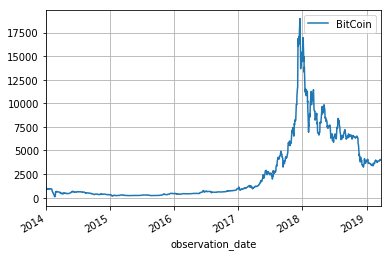

In [92]:
#BitCoin - TimeSeries Plot
df.bit_coin.plot(grid=True, label="BitCoin", legend=True)

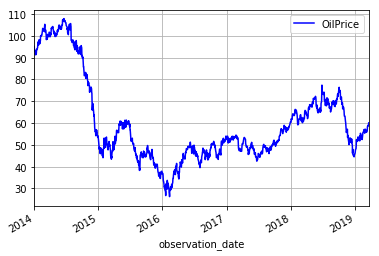

In [93]:
#OilPrice - TimeSeries Plot
df.DCOILWTICO.plot(grid=True, label="OilPrice", legend=True,color='Blue')

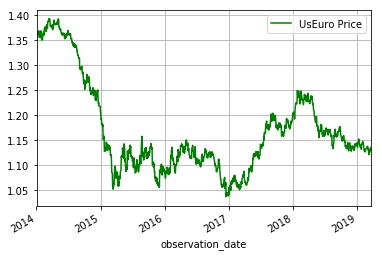

In [94]:
#US/EURO Exchange - TimeSeries Plot
df.DEXUSEU.plot(grid=True, label="UsEuro Price", legend=True,color='green')

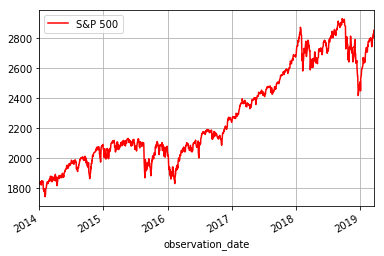

In [95]:
#S&P 500 - TimeSeries Plot
df.SP500.plot(grid=True, label="S&P 500", legend=True,color='red')

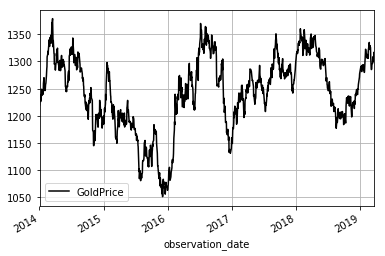

In [96]:
#Gold Price - TimeSeries Plot
df.GOLDAMGBD228NLBM.plot(grid=True, label="GoldPrice", legend=True,color='black')

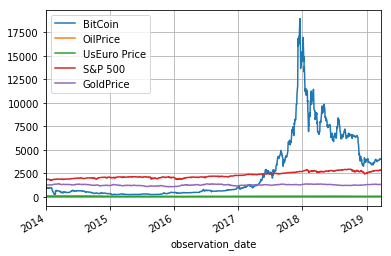

In [97]:
#Plotting all the prices together
# It can be observed that the price of bitcoin is way out of propotions compared to other prices
df.bit_coin.plot(grid=True, label="BitCoin", legend=True)
df.DCOILWTICO.plot(grid=True, label="OilPrice", legend=True)
df.DEXUSEU.plot(grid=True, label="UsEuro Price", legend=True)
df.SP500.plot(grid=True, label="S&P 500", legend=True)
df.GOLDAMGBD228NLBM.plot(grid=True, label="GoldPrice", legend=True)

In [98]:
#Regressing other prices on bitcoin
Y=np.array(df[['bit_coin']])
X=np.array(df[['DCOILWTICO','DEXUSEU','SP500','GOLDAMGBD228NLBM']])
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1015.
Date:                Fri, 14 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:32:31   Log-Likelihood:                -11284.
No. Observations:                1276   AIC:                         2.258e+04
Df Residuals:                    1271   BIC:                         2.260e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.021e+04   1255.241    -32.031      0.0

#### Regression result - Inferences
* There is a high r-coefficient if 0.7 and all the variables being significant from the regression.
* Even though there is high R-squared value and values being significant, this is not a good model reson being spurious correlation.
* From the time series plots earlier, it can be observed that none of the series are stationary.
* First we have to make them stationary, before running the regression.

In [99]:
#KPSS Function (Test for stationarity)
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [100]:
#KPSS Test DCOILWTICO(Oil Price)
oil_temp=df['DCOILWTICO']
print(kpss_test(oil_temp)) #The series is not Stationary
oil_1stdiff = oil_temp - oil_temp.shift(1)
print('\n***KPSS Test - After First Differencing***\n')
print(kpss_test(oil_1stdiff[1:])) #The series is Stationary after one differencing

Results of KPSS Test:
Test Statistic            1.550172
p-value                   0.010000
Lags Used                23.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None

***KPSS Test - After First Differencing***

Results of KPSS Test:
Test Statistic            0.285064
p-value                   0.100000
Lags Used                23.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


C:\Users\sudha\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\sudha\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


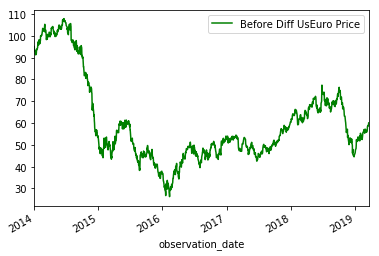

In [101]:
#Before becoming Stationary
df['DCOILWTICO'].plot(label="Before Diff UsEuro Price", legend=True,color='green')

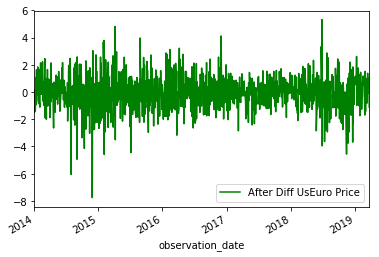

In [102]:
#Becoming Stationary after one differencing
oil_1stdiff.dropna().plot(label="After Diff UsEuro Price", legend=True,color='green')

In [103]:
#KPSS Test US Euro(DEXUSEU)
us_euro_temp=df['DEXUSEU']
print(kpss_test(us_euro_temp)) #The series is not Stationary
us_euro_1stdiff = us_euro_temp - us_euro_temp.shift(1)
print('\n***KPSS Test - After First Differencing***\n')
print(kpss_test(us_euro_1stdiff[1:])) #The series is Stationary after one differencing

Results of KPSS Test:
Test Statistic            1.622418
p-value                   0.010000
Lags Used                23.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None

***KPSS Test - After First Differencing***

Results of KPSS Test:
Test Statistic            0.332662
p-value                   0.100000
Lags Used                23.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


C:\Users\sudha\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\sudha\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


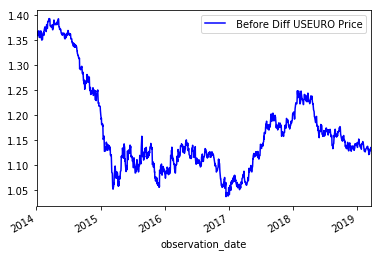

In [104]:
#Before becoming Stationary
df['DEXUSEU'].plot(label=" Before Diff USEURO Price", legend=True,color='Blue')

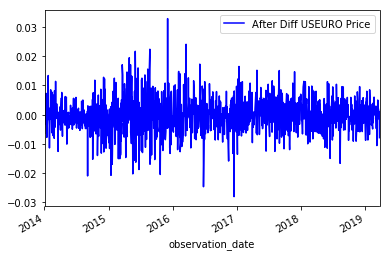

In [105]:
#Becoming Stationary after one differencing
us_euro_1stdiff.dropna().plot(label="After Diff USEURO Price", legend=True,color='Blue')

In [106]:
#KPSS Test S&P 500 (SP500)
SP500_temp=df['SP500']
print(kpss_test(SP500_temp)) #The series is not Stationary
SP500_temp_1stdiff = SP500_temp - SP500_temp.shift(1)
print('\n***KPSS Test - After First Differencing***\n')
print(kpss_test(SP500_temp_1stdiff[1:])) #The series is Stationary after one differencing

Results of KPSS Test:
Test Statistic            4.917318
p-value                   0.010000
Lags Used                23.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None

***KPSS Test - After First Differencing***

Results of KPSS Test:
Test Statistic            0.047565
p-value                   0.100000
Lags Used                23.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


C:\Users\sudha\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\sudha\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


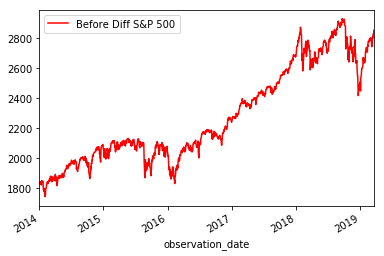

In [107]:
#Before becoming Stationary
df['SP500'].plot(label="Before Diff S&P 500", legend=True,color='red')

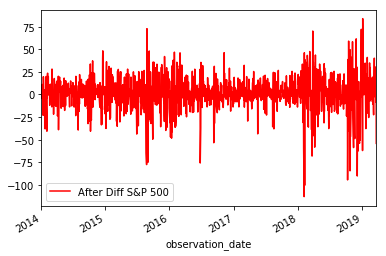

In [108]:
#Becoming Stationary after one differencing
SP500_temp_1stdiff.dropna().plot(label="After Diff S&P 500", legend=True,color='red')

In [109]:
#KPSS Test for Gold (GOLDAMGBD228NLBM)
gold_temp=df['GOLDAMGBD228NLBM']
print(kpss_test(gold_temp)) #The series is not Stationary
gold_temp_1stdiff = gold_temp - gold_temp.shift(1)
print('\n***KPSS Test - After First Differencing***\n')
print(kpss_test(gold_temp_1stdiff[1:])) #The series is Stationary after one differencing

Results of KPSS Test:
Test Statistic            0.749896
p-value                   0.010000
Lags Used                23.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None

***KPSS Test - After First Differencing***

Results of KPSS Test:
Test Statistic            0.039994
p-value                   0.100000
Lags Used                23.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


C:\Users\sudha\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\sudha\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


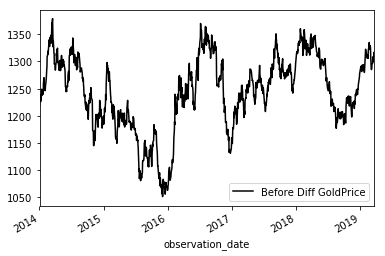

In [110]:
#Before becoming Stationary
df['GOLDAMGBD228NLBM'].plot(label="Before Diff GoldPrice", legend=True,color='black')

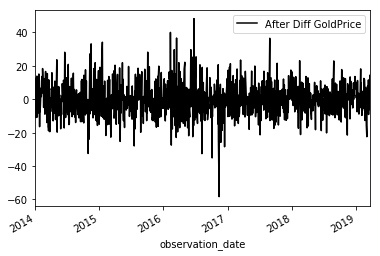

In [111]:
#Becoming Stationary after one differencing
gold_temp_1stdiff.dropna().plot(label="After Diff GoldPrice", legend=True,color='black')

In [112]:
#Converting prices into DataFrame columns 
oil=pd.DataFrame(oil_1stdiff)
euro=pd.DataFrame(us_euro_1stdiff)
sp500=pd.DataFrame(SP500_temp_1stdiff)
gold=pd.DataFrame(gold_temp_1stdiff)

In [113]:
#Merging all the Datasets Together
df_1=oil.merge(euro,on='observation_date')
df_2=df_1.merge(sp500,on='observation_date')
df_3=df_2.merge(gold,on='observation_date')
df=df_3.merge(df['bit_coin'],on='observation_date')
df=df.dropna() #Dropping the first observation that does not contain any difference value.
df.head()

,DCOILWTICO,DEXUSEU,SP500,GOLDAMGBD228NLBM,bit_coin
observation_date,,,,,
2014-01-03,-1.48,-0.0064,-0.61,12.50,884.260010
2014-01-06,-0.54,0.0030,-4.60,5.75,1012.650024
2014-01-07,0.19,-0.0018,11.11,-0.50,879.900024
2014-01-08,-1.41,-0.0032,-0.39,-11.00,938.840027
2014-01-09,-0.54,0.0005,0.64,-0.50,936.950012


In [114]:
#OLS Regression on bitcoin Price after first differencing
Y1=np.array(df[['bit_coin']])
X1=np.array(df[['DCOILWTICO','DEXUSEU','SP500','GOLDAMGBD228NLBM']])
#lm(X,Y).tidy()
X1 = sm.add_constant(X1)
model1 = sm.OLS(Y1, X1)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6925
Date:                Fri, 14 Jun 2019   Prob (F-statistic):              0.597
Time:                        18:32:32   Log-Likelihood:                -12188.
No. Observations:                1275   AIC:                         2.439e+04
Df Residuals:                    1270   BIC:                         2.441e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2614.7980     96.404     27.123      0.0

#### Regression after making the series stationary
* Now we can see that none of variables are a good indicator for explaining the bitcoin price
* R-square is very low.

## ARIMA - Time Series Prediction (BitCoin Price prediction)

In [115]:
#Removing all the data before 2017
df_2017=df.loc['2016-12-31':]

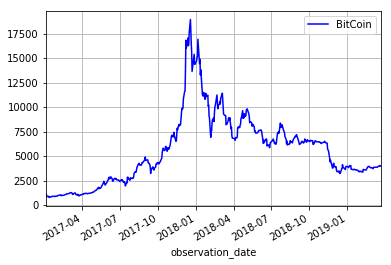

In [116]:
# Plotting the subsetted time series plot
df_2017.bit_coin.plot(grid=True, label="BitCoin", legend=True,color='Blue')

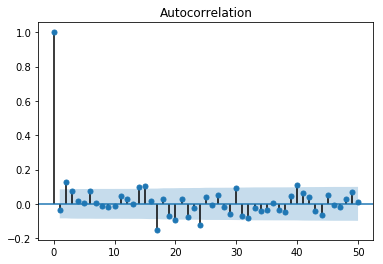

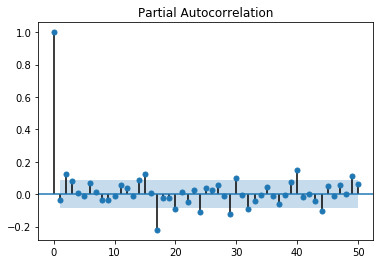

In [117]:
#Plotting Autocorrelation(ACF) and Partial Autocorrelation(PACF) for bitcoin prices
temp1=df_2017.bit_coin-df_2017.bit_coin.shift(1)
temp1=temp1.dropna()
plot_acf(temp1,lags=50);
plot_pacf(temp1,lags=50);
#Both ACF and PACF drops below the threshold after 0 lags, therefore p=0 and q=0 
# d=1 (After one differencing)

In [118]:
#Fitting ARIMA Modelon Bitcoin prices
# ARIMA(p,d,q) = ARIMA(0,1,0)
model2 = ARIMA(df_2017.bit_coin, order=(0,1,0))
model_fit = model2.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.bit_coin   No. Observations:                  537
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3995.556
Method:                           css   S.D. of innovations            412.228
Date:                Fri, 14 Jun 2019   AIC                           7995.113
Time:                        18:32:32   BIC                           8003.685
Sample:                             1   HQIC                          7998.466
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5261     17.789      0.311      0.756     -29.340      40.392


C:\Users\sudha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sudha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sudha\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\sudha\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWa

In [119]:
#Forecasting bitcoin prices for next 30 days
prediction = model_fit.forecast(steps=30)[0]

In [120]:
#Attaching the forecasted timeseries data to their corresponding dates
lst=[]
for i in range(1,31):
    lst.append((df_2017.index.max().date() + pd.Timedelta(i, 'D')).strftime("%Y-%m-%d %H:%M:%S"))

In [121]:
#Displaying the head of the forecasted Bitcoin prices
forcast_bit=pd.concat([pd.Series(lst),pd.Series(prediction)],axis=1)
forcast_bit.columns=['observation_date','bit_coin']
forcast_bit = forcast_bit.set_index(pd.to_datetime(forcast_bit.observation_date), drop=True)
forcast_bit.head()

,observation_date,bit_coin
observation_date,,
2019-03-23,2019-03-23 00:00:00,4006.366233
2019-03-24,2019-03-24 00:00:00,4011.892379
2019-03-25,2019-03-25 00:00:00,4017.418524
2019-03-26,2019-03-26 00:00:00,4022.944669
2019-03-27,2019-03-27 00:00:00,4028.470815


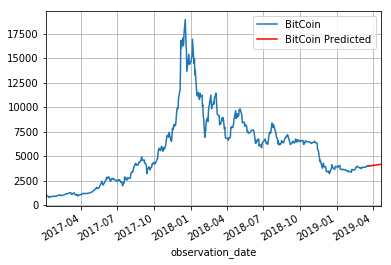

In [122]:
#Plotting forecasted bitcoin prices for the next 30 days
df_2017.bit_coin.plot(grid=True, label="BitCoin", legend=True)
forcast_bit.bit_coin.plot(grid=True, label="BitCoin Predicted",color='Red', legend=True)

## Vector AutoRegression Model (VAR Model)

##### VAR model helps capturing the linear interdependencies among multiple time series data. 

In [123]:
#Fitting VAR model that best captures the relationship between our 5 variables
data=np.array(df[['bit_coin','DCOILWTICO','DEXUSEU','SP500','GOLDAMGBD228NLBM']])
model = VAR(data)
results = model.fit(maxlags=15, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 14, Jun, 2019
Time:                     18:32:33
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    11.7543
Nobs:                     1274.00    HQIC:                   11.6785
Log likelihood:          -16418.9    FPE:                    112757.
AIC:                      11.6330    Det(Omega_mle):         110139.
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        10.422839         9.479040            1.100           0.272
L1.y1         0.996889         0.002195          454.063           0.000
L1.y2        -2.239194         6.358934           -0.352           0.725
L1.y3       578.633445

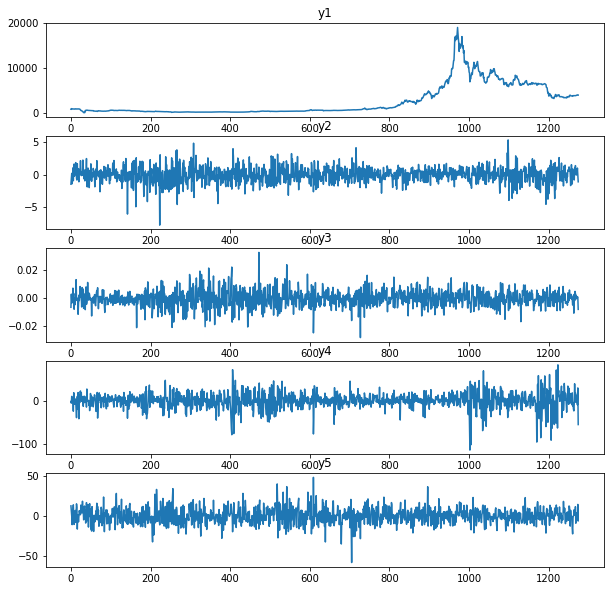

In [124]:
#Plotting Time series plot of the variables
results.plot();

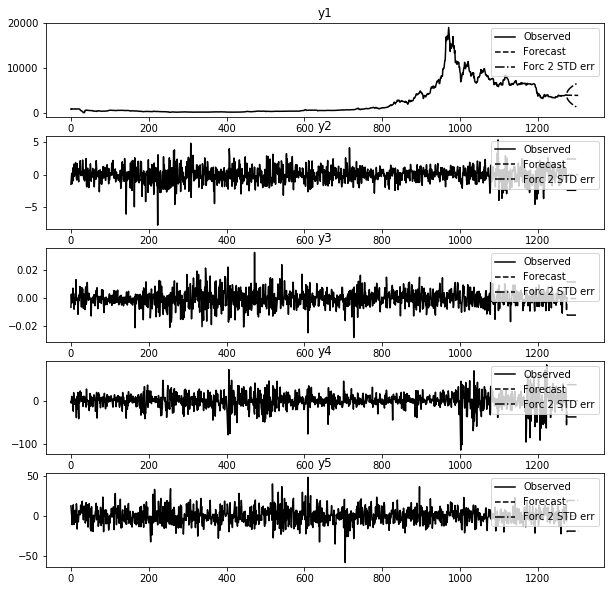

In [125]:
#Plotting the Forecasted VAR model for next 30 days
results.plot_forecast(30);